## Лабораторна робота №1. Використання бібліотек Pandas та Matplotlib

## 0. Імпорт потрібних бібліотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import random

## 1. Відкрити та зчитати файл з даними.

In [2]:
# Застосування префіксу "r" дозволяє забезпечити, що рядок буде трактуватися буквально,
# і жодні спеціальні символи (такі як \n або \t) не будуть інтерпретовані як управляючі послідовності.

Datafile = r'Vehicle_Sales.csv'
df = pd.read_csv(Datafile)

## 2. Визначити та вивести кількість записів та кількість полів у кожному записі.

In [3]:
df

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,$755015820,$386481929
1,2002,FEB,27520,50982,$664454223,$361353242
2,2002,MAR,34225,58794,$805666244,$419385387
3,2002,APR,36452,59817,$846368297,$433061150
4,2002,MAY,37359,60577,$855005784,$442569410
...,...,...,...,...,...,...
181,2017,FEB,22413,55989,$776222008,$592255229
182,2017,MAR,27838,72717,$926703144,$744746293
183,2017,APR,26135,62740,$867722291,$654981615
184,2017,MAY,28931,68296,$937804113,$718689038


## 3. Вивести К+7 перших та 5К-3 останніх записів.

In [4]:
k = int(input('Enter value k - '))

Enter value k - 6


In [5]:
print(f"\nK = {k} \n", df[0:k+7], "\n\n", df[5*k-3:])


K = 6 
     Year Month    New   Used Total Sales New Total Sales Used
0   2002   JAN  31106  49927      $755015820       $386481929
1   2002   FEB  27520  50982      $664454223       $361353242
2   2002   MAR  34225  58794      $805666244       $419385387
3   2002   APR  36452  59817      $846368297       $433061150
4   2002   MAY  37359  60577      $855005784       $442569410
5   2002   JUN  36348  55415      $830251613       $414731166
6   2002   JUL  30367  55235      $700530891       $384673023
7   2002   AUG  38965  60310      $934484212       $455453720
8   2002   SEP  39740  55485      $950502055       $432112270
9   2002   OCT  35276  58020      $865326154       $456738532
10  2002   NOV  27812  49066      $691740703       $379196575
11  2002   DEC  26994  42461      $673208880       $374453368
12  2003   JAN  34707  49481      $860730784       $392438833 

      Year Month    New   Used Total Sales New Total Sales Used
27   2004   APR  37478  64059      $919596999       $4720

In [6]:
df.head(k+7), df.tail(5*k-3)

(    Year Month    New   Used Total Sales New Total Sales Used
 0   2002   JAN  31106  49927      $755015820       $386481929
 1   2002   FEB  27520  50982      $664454223       $361353242
 2   2002   MAR  34225  58794      $805666244       $419385387
 3   2002   APR  36452  59817      $846368297       $433061150
 4   2002   MAY  37359  60577      $855005784       $442569410
 5   2002   JUN  36348  55415      $830251613       $414731166
 6   2002   JUL  30367  55235      $700530891       $384673023
 7   2002   AUG  38965  60310      $934484212       $455453720
 8   2002   SEP  39740  55485      $950502055       $432112270
 9   2002   OCT  35276  58020      $865326154       $456738532
 10  2002   NOV  27812  49066      $691740703       $379196575
 11  2002   DEC  26994  42461      $673208880       $374453368
 12  2003   JAN  34707  49481      $860730784       $392438833,
      Year Month    New   Used Total Sales New Total Sales Used
 159  2015   APR  32240  64350      $988046475       

## 4. Визначити та вивести тип полів кожного запису.

In [7]:
df.dtypes

Year                 int64
Month               object
New                  int64
Used                 int64
Total Sales New     object
Total Sales Used    object
dtype: object

## 5. Привести поля, що відповідають обсягам продаж, до числового вигляду(показати, що це виконано).

In [8]:
df['Total Sales New'] = df['Total Sales New'].map(lambda x: x.lstrip('$'))
df['Total Sales Used'] = df['Total Sales Used'].map(lambda x: x.lstrip('$'))
df = df.astype({'Total Sales New': int, 'Total Sales Used': int})

In [9]:
df.dtypes

Year                 int64
Month               object
New                  int64
Used                 int64
Total Sales New      int32
Total Sales Used     int32
dtype: object

## 6. Ввести нові поля:

a. Сумарний обсяг продаж автомобілів (нових та б/в) у кожний
період;

In [10]:
df['Summ sold'] = df['New'] + df['Used']

b. Сумарний дохід від продажу автомобілів (нових та б/в) у кожний
період;

In [11]:
df['Summ income'] = df[['Total Sales New', 'Total Sales Used']].sum(axis=1)

c. Різницю в обсязі продаж нових та б/в автомобілів у кожній
період.

In [12]:
df['Sales difference'] = df['Total Sales New'] - df['Total Sales Used']

In [13]:
df

,Year,Month,New,Used,Total Sales New,Total Sales Used,Summ sold,Summ income,Sales difference
0,2002,JAN,31106,49927,755015820,386481929,81033,1141497749,368533891
1,2002,FEB,27520,50982,664454223,361353242,78502,1025807465,303100981
2,2002,MAR,34225,58794,805666244,419385387,93019,1225051631,386280857
3,2002,APR,36452,59817,846368297,433061150,96269,1279429447,413307147
4,2002,MAY,37359,60577,855005784,442569410,97936,1297575194,412436374
...,...,...,...,...,...,...,...,...,...
181,2017,FEB,22413,55989,776222008,592255229,78402,1368477237,183966779
182,2017,MAR,27838,72717,926703144,744746293,100555,1671449437,181956851
183,2017,APR,26135,62740,867722291,654981615,88875,1522703906,212740676
184,2017,MAY,28931,68296,937804113,718689038,97227,1656493151,219115075


## 7. Змінити порядок розташування полів таким чином:
Рік, Місяць,Сумарний дохід, Дохід від продажу нових автомобілів,
Дохід відпродажу б/в автомобілів, Сумарний обсяг продаж,
Обсяг продаж нових автомобілів, Обсяг продаж б/в автомобілів,
Різниця між обсягами продаж нових та б/в автомобілів.

In [14]:
df = df[['Year', 'Month', 'Summ income','Total Sales New',
         'Total Sales Used','Summ sold', 'New', 'Used', 
         'Sales difference']]

In [15]:
df

,Year,Month,Summ income,Total Sales New,Total Sales Used,Summ sold,New,Used,Sales difference
0,2002,JAN,1141497749,755015820,386481929,81033,31106,49927,368533891
1,2002,FEB,1025807465,664454223,361353242,78502,27520,50982,303100981
2,2002,MAR,1225051631,805666244,419385387,93019,34225,58794,386280857
3,2002,APR,1279429447,846368297,433061150,96269,36452,59817,413307147
4,2002,MAY,1297575194,855005784,442569410,97936,37359,60577,412436374
...,...,...,...,...,...,...,...,...,...
181,2017,FEB,1368477237,776222008,592255229,78402,22413,55989,183966779
182,2017,MAR,1671449437,926703144,744746293,100555,27838,72717,181956851
183,2017,APR,1522703906,867722291,654981615,88875,26135,62740,212740676
184,2017,MAY,1656493151,937804113,718689038,97227,28931,68296,219115075


## 8. Визначити та вивести:

a. Рік та місяць, у які нових автомобілів було продано менше за б/в;

In [16]:
filter_8a = df['New'] < df['Used']

In [17]:
print(df[filter_8a][['Year', 'Month']].apply(lambda j: ' - '.join([str(x) for x in j]), axis=1).values)

['2002 - JAN' '2002 - FEB' '2002 - MAR' '2002 - APR' '2002 - MAY'
 '2002 - JUN' '2002 - JUL' '2002 - AUG' '2002 - SEP' '2002 - OCT'
 '2002 - NOV' '2002 - DEC' '2003 - JAN' '2003 - FEB' '2003 - MAR'
 '2003 - APR' '2003 - MAY' '2003 - JUN' '2003 - JUL' '2003 - AUG'
 '2003 - SEP' '2003 - OCT' '2003 - NOV' '2003 - DEC' '2004 - JAN'
 '2004 - FEB' '2004 - MAR' '2004 - APR' '2004 - MAY' '2004 - JUN'
 '2004 - JUL' '2004 - AUG' '2004 - SEP' '2004 - OCT' '2004 - NOV'
 '2004 - DEC' '2005 - JAN' '2005 - FEB' '2005 - MAR' '2005 - APR'
 '2005 - MAY' '2005 - JUN' '2005 - JUL' '2005 - AUG' '2005 - SEP'
 '2005 - OCT' '2005 - NOV' '2005 - DEC' '2006 - JAN' '2006 - FEB'
 '2006 - MAR' '2006 - APR' '2006 - MAY' '2006 - JUN' '2006 - JUL'
 '2006 - AUG' '2006 - SEP' '2006 - OCT' '2006 - NOV' '2006 - DEC'
 '2007 - JAN' '2007 - FEB' '2007 - MAR' '2007 - APR' '2007 - MAY'
 '2007 - JUN' '2007 - JUL' '2007 - AUG' '2007 - SEP' '2007 - OCT'
 '2007 - NOV' '2007 - DEC' '2008 - JAN' '2008 - FEB' '2008 - MAR'
 '2008 - A

b. Рік та місяць, коли сумарний дохід був мінімальним;

In [18]:
summ_income_id_min = df['Summ income'].idxmin()

In [19]:
df.loc[summ_income_id_min][['Year', 'Month']]

Year     2010
Month     FEB
Name: 97, dtype: object

c. Рік та місяць, коли було продано найбільше б/в авто.

In [20]:
summ_sold_id_max = df['Summ sold'].idxmax()

In [21]:
df.loc[summ_sold_id_max][['Year', 'Month']]

Year     2005
Month     AUG
Name: 43, dtype: object

## 9. Визначити та вивести:

a. Сумарний обсяг продажу транспортних засобів за кожен рік;

In [22]:
obsyag_cols = ['Summ sold', 'New', 'Used']

In [23]:
df.groupby('Year')[obsyag_cols].sum()

,Summ sold,New,Used
Year,,,
2002,1058253,402164,656089
2003,1103610,428252,675358
2004,1128185,428508,699677
2005,1125669,421834,703835
2006,1096250,399282,696968
2007,1056733,378184,678549
2008,927044,309159,617885
2009,857817,248928,608889
2010,894067,268022,626045


b. Середній дохід від продажу б/в транспортних засобів в місяці М,
де М – це порядковий номер у списку підгрупи за абеткою.

In [24]:
y = 11  # Mitchenko Anton var 11
monthes_list = df['Month'].unique()
month_filter = df['Month'] == monthes_list[y-1]

In [25]:
print('Середній дохід від продажу б/в транспортних засобів в місяці NOV = ', df[month_filter]['Total Sales Used'].mean())

Середній дохід від продажу б/в транспортних засобів в місяці NOV =  437489410.2


## 10. Побудувати стовпчикову діаграму:
обсягу продаж нових авто у році 20YY, де дві останні цифри року визначаються як 17 – порядковий номер у списку підгрупи за абеткою.

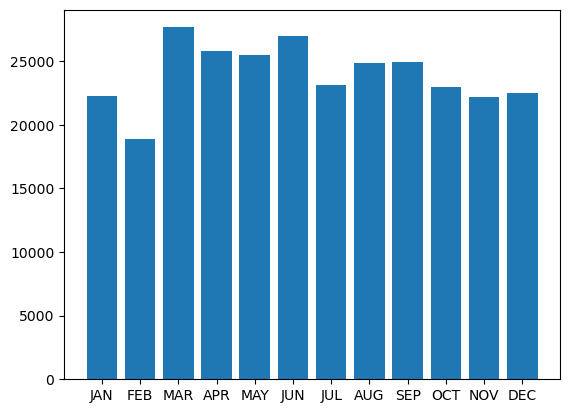

In [26]:
plt.bar(df.query("Year == 2011")['Month'], df.query("Year == 2011")['New'])
plt.show()

## 11. Побудувати кругову діаграму сумарного обсягу продаж за кожен рік.

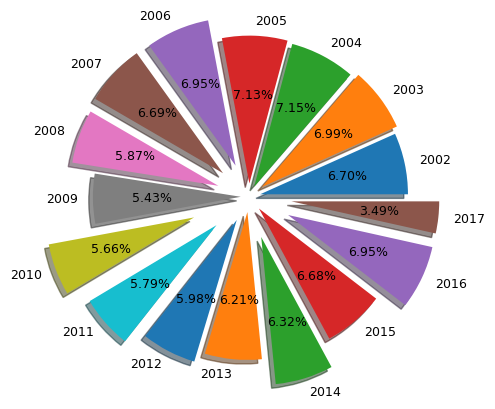

In [27]:
labels = ['2002', '2003', '2004', '2005',
          '2006', '2007', '2008', '2009',
          '2010', '2011', '2012', '2013',
          '2014', '2015', '2016', '2017']
obsyag_cols = ['Summ sold']
myexplode = [random.uniform(0, 0.4) for i in range(len(labels))]

plt.pie(df.groupby('Year')[obsyag_cols].sum()['Summ sold'],
        autopct='%1.2f%%',
        textprops={'fontsize':9},
        labels=labels,
        explode = myexplode,
        shadow = True)

plt.show()

## 12. Побудувати на одному графіку:

a. Сумарний дохід від продажу нових авто;

In [28]:
ts_new = (df.groupby('Year').sum()['Total Sales New'])/10**9

b. Сумарний дохід від продажу старих авто. 

In [29]:
ts_used = (df.groupby('Year').sum()['Total Sales Used'])/10**9

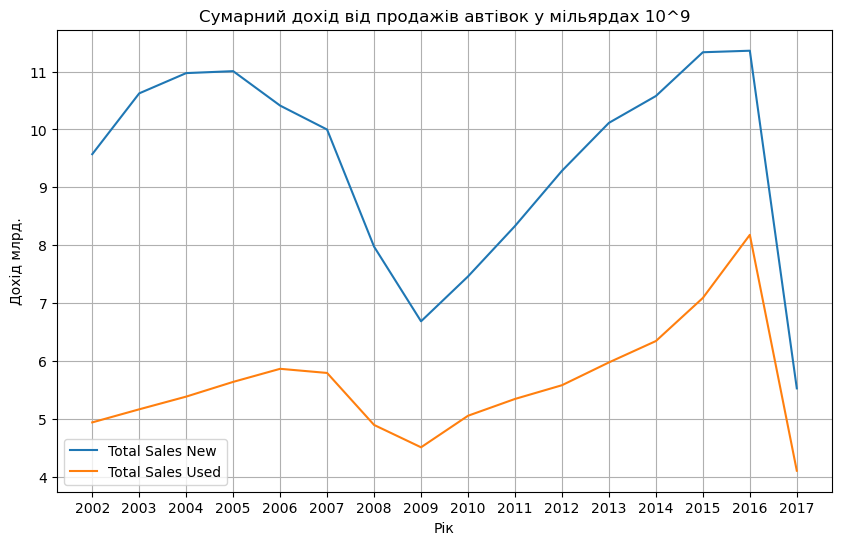

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(labels, ts_new, label ='Total Sales New')
plt.plot(labels, ts_used, label ='Total Sales Used')
plt.title("Сумарний дохід від продажів автівок у мільярдах 10^9")
plt.xlabel("Рік")
plt.ylabel("Дохід млрд.")
plt.legend()
plt.grid()
plt.show()